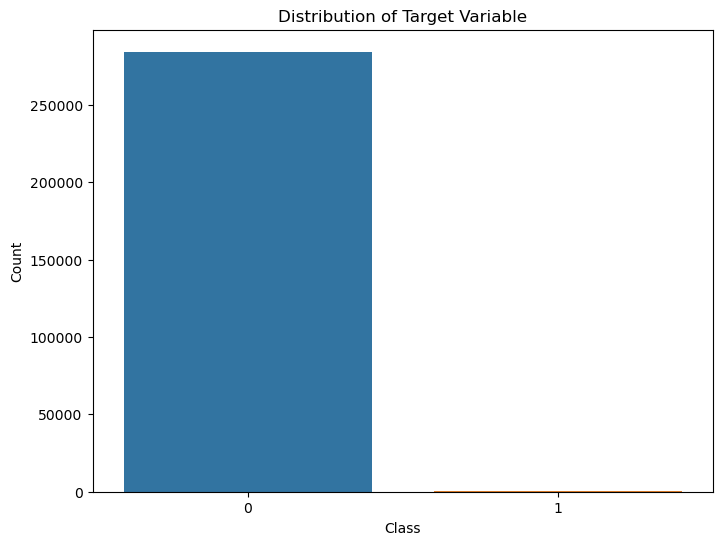

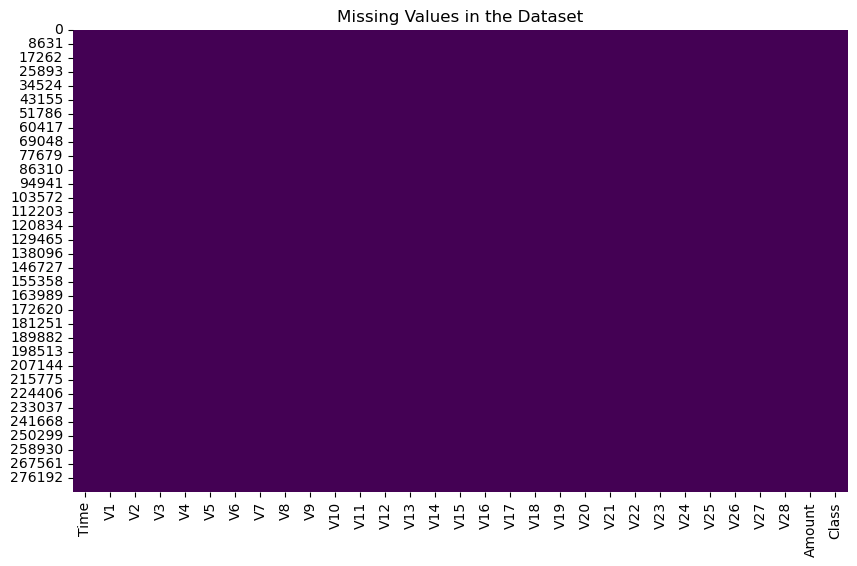

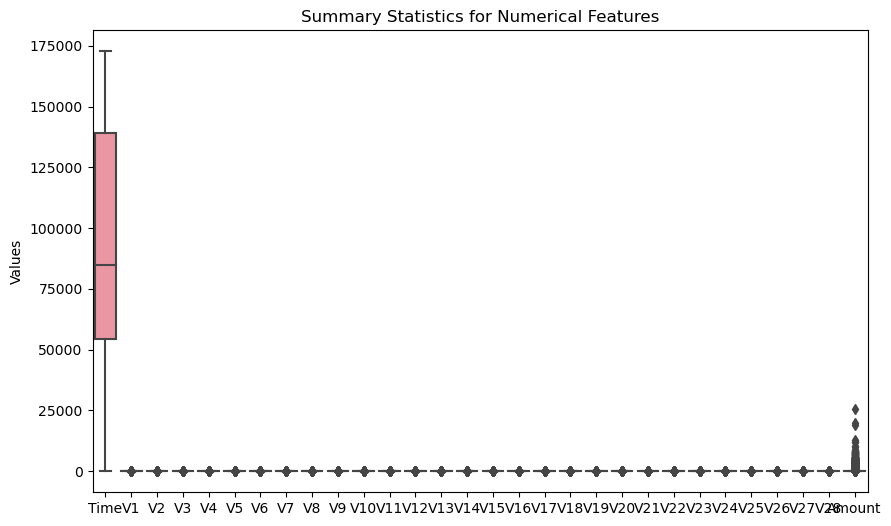

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

Error in callback <function flush_figures at 0x000001FE79DDECA0> (for post_execute):


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Load the dataset with 'use_inf_as_na' set to False
data = pd.read_csv(r'C:/Users/shriy/Downloads/creditcard.csv')

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Exploratory Data Analysis (EDA)

# Data Quality Check

# Show the distribution of the target variable (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Check for missing values in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

# Summary Statistics

# Display summary statistics for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('Class', axis=1))
plt.title('Summary Statistics for Numerical Features')
plt.ylabel('Values')
plt.show()

# Identification of Patterns and Trends

# Use scatter plots to explore relationships between numerical features
plt.figure(figsize=(10, 6))
sns.pairplot(data=data, hue='Class')
plt.title('Relationships Between Numerical Features')
plt.show()

# Visualize the correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot time series plots to explore temporal patterns in the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='amount', data=data, hue='Class')
plt.title('Temporal Patterns in Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

# Handle Class Imbalance using SMOTE
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Model Selection and Training (Random Forest)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Assess model performance
print("\nRandom Forest Classifier:")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Model Selection and Training (Support Vector Classifier)
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_clf.predict(X_test)

# Assess model performance
print("\nSupport Vector Classifier:")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))

# Model Selection and Hyperparameter Tuning (Random Forest)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_

# Cross-validation
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')

print("\nBest Random Forest Classifier after Hyperparameter Tuning:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Mean CV Accuracy:", np.mean(cv_scores_rf))

# Model Deployment (Random Forest)
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)

# Model Selection and Hyperparameter Tuning (Support Vector Classifier)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search_svc = GridSearchCV(estimator=svc_clf, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=2)
grid_search_svc.fit(X_train, y_train)

best_model_svc = grid_search_svc.best_estimator_

# Cross-validation
cv_scores_svc = cross_val_score(best_model_svc, X_train, y_train, cv=5, scoring='accuracy')

print("\nBest Support Vector Classifier after Hyperparameter Tuning:")
print("Best Parameters:", grid_search_svc.best_params_)
print("Mean CV Accuracy:", np.mean(cv_scores_svc))

# Model Deployment (Support Vector Classifier)
with open('support_vector_model.pkl', 'wb') as f:
    pickle.dump(best_model_svc, f)

# Define API endpoints for model deployment (Flask)
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    prediction_rf = best_model_rf.predict(data)
    prediction_svc = best_model_svc.predict(data)
    return jsonify({'prediction_rf': prediction_rf, 'prediction_svc': prediction_svc})

if __name__ == '__main__':
    app.run(debug=True)

In [2]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
